<h1 style='color:#0000ec'>3 &nbsp; O Método de Euler </h1>

&nbsp; O método de Euler baseia-se no fato de conhecermos a derivada da função em qualquer ponto e um ponto pertencente à curva para determinar uma coleção de pontos próximos a solução do problema.

&nbsp; Dado o problema de valor inicial (Lei de resfriamento de Newton):

$$\begin{cases} T'=-0.1 \: ( \: T \:- 20 \: )  \\ T(0)= 80 \end{cases}$$

&nbsp; Conhecendo o valor inicial representado por $(t_{0},T_{0})$, temos:

$$ T'(t_{0}) \approx \frac{T_{1}-T_{0}}{t_{1}-t_{0}} $$

&nbsp; Isolando $T_{1}$,

$$ T_{1} \approx T_{0} + (t_{1}-t_{0})\ T'(t_{0}) $$

&nbsp; Considerando $f(T)=-0.1 \: ( \: T \:- 20 \: )=T' $, temos:

$$ T_{1} \approx T_{0} + (t_{1}-t_{0})\ f(t_{0}) $$

&nbsp; Mas, $(t_{1}-t_{0})$ é o passo de derivação e pode ser tratado como uma constante $h$, portanto:

$$ T_{1} \approx T_{0} + h\ f(t_{0})$$
$$ T_{2} \approx T_{1} + h\ f(t_{1})$$
$$ \vdots $$
$$ T_{n+1} \approx T_{n} + h\ f(t_{n})$$

<h2 style='color:#0000b7'>3.1 &nbsp; Método de Euler - Pseudocódigo</h2>
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<b>Entrada:</b> A função $f(T)$, a condição inicial $(t_{0},T_{0})$, o passo $h$ e o vetor tempo $t$.<br>
    <b>Saída:</b> os vetores $t$ e $T$ tais que $T_{i} \approx T(t_{i})$ .<br>
    <b>Início:</b>
    <ol>
  <li>$t\leftarrow  t_{inicial}:h:t_{final}$</li>
  <li>$T_{1}\leftarrow  80$</li>
  <li><b>para</b> t <b>faça</b></li>
  <li>|&nbsp;&nbsp;&nbsp;&nbsp;$T_{i+1} \leftarrow  T_{i}+h*f(T_{i})$</li>
  <li>|&nbsp;&nbsp;&nbsp;&nbsp;$T \leftarrow T_{i+1}$</li>
  <li><b>fim</b></li>
  <li>retorna($t,T$)</li>
</ol>
    <b>Fim</b>
</div>

<h2 style='color:#0000b7'>3.2 &nbsp; Método de Euler - Implementação</h2>

&nbsp; Importando as bibliotecas NumPy e Matplotlib ao arquivo <b>atual</b>:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; Carregando o diretório <i><b>python/</b></i> que contém as funções escritas ao longo dos tópicos:

In [2]:
import sys
sys.path.insert(0, '../python')

&nbsp; Escrevendo arquivo contendo a função <b><i>f(&lt;temperatura&gt;)</i></b> contendo o modelo matemático do fenômeno

In [3]:
%%writefile ../python/f.py
def f(T):
    return -0.1*(T-20)

Overwriting ../python/f.py


&nbsp; Construindo e salvando em <i><b>python/</b></i> a função <b><i>sol_euler(&lt;vetor_tempo&gt;,&lt;condição_inicial&gt;)</i></b>, responsável por aplicar o método de Euler num intervalo de tempo <b><i>vt</i></b>, dada a condição inicial <b><i>T0</i></b>:

In [4]:
%%writefile ../python/sol_euler.py
#dependências
import numpy as np
from f import f

def sol_euler(vt,T0):
    
    #Declarando vetor de temperaturas
    T = np.array([T0])
    
    #Obtendo passo de derivação (h)
    h = vt[2] - vt[1]

    #Aproximando T(i) pelo método de Euler
    for t in vt:
        Ti = T[-1]+h*f(T[-1])
        T = np.append(T,Ti)
        
    return T[0:T.shape[0]-1]

Overwriting ../python/sol_euler.py


&nbsp; Importando a função <b><i>sol_euler</i></b> escrita em <b>[4]</b>

In [5]:
from sol_euler import sol_euler

&nbsp; Note que retornamos o vetor de temperaturas <b><i>T</i></b>, mas excluímos o último elemento. &nbsp; Isto deve-se ao fato de que o intervalo de tempo <b><i>vt</i></b> sempre terá um elemento a mais que o vetor de temperaturas, uma vez que <b><i>T</i></b> já contém a solução inicial. &nbsp; Logo, para operar <b><i>T</i></b> e <b><i>vt</i></b>, precisamos excluir o último elemento de <b><i>T</i></b>, de forma que os vetores tenham o mesmo tamanho. 
<br>
&nbsp; Como veremos no próximo estudo comparativo, estamos interessados em passos de derivação da seguinte forma:
$$ 0<h<1, \ h\in \mathbb{R} $$
&nbsp; Logo, a remoção de um ponto não altera significativamente a aproximação da solução do problema. 
<br>
<br>
&nbsp; Uma vez definido o método de Euler, basta declarar o passo de derivação <b><i>h</i></b>, a condição inicial <b><i>T0</i></b>, o tempo inicial <b><i>ti</i></b>, o tempo final <b><i>tf</i></b> e o intervalo de tempo <b><i>vt</i></b>:

In [6]:
#Passo de derivação
h = 0.001

#Condição inicial
T0 = 80

#tempo inicial
ti = 0

#tempo final
tf = 60

#Intervalo de 0 à 60 minutos com passo h
vt = np.arange(ti,tf,h)

&nbsp; Atribuindo as variáveis aos parâmetros de <b><i>sol_euler</i></b>:

In [7]:
%%time
T = sol_euler(vt,T0)
print(T)
print('O vetor de temperaturas tem {} elementos'.format(T.shape[0]))

[80.         79.994      79.9880006  ... 20.14872513 20.14871026
 20.14869539]
O vetor de temperaturas tem 60000 elementos
CPU times: total: 1.86 s
Wall time: 1.89 s


[80.    &nbsp;      79.994  &nbsp;    79.9880006 &nbsp;  ... &nbsp;  20.14872513 &nbsp;  20.14871026 &nbsp; 
 20.14869539] <br>
O vetor de temperaturas tem 60000 elementos

&nbsp; Exibindo o gráfico <b>vt</b> $\times$ <b>T</b> 

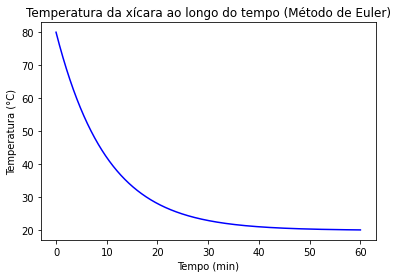

In [8]:
plt.plot(vt,T,'b',label='Euler')
plt.title('Temperatura da xícara ao longo do tempo (Método de Euler)')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
#plt.legend()
plt.show()

<h2 style='color:#0000b7'>3.3 &nbsp; Estudo comparativo - Diferentes passos de derivação</h2>

&nbsp; Este tópico tem como objetivo estudar o comportamento da solução numérica para diferentes passos de derivação.
<br>
<br>
&nbsp; Construímos um vetor <b><i>passos</i></b> contendo  os passos de derivação. &nbsp; Além disso, é importante para o estudo comparativo que as curvas possuam cores distintas. &nbsp; Desta forma, construímos também um vetor de <i><b>cores</b></i>. 
<br> &nbsp; Cada elemento de <i><b>cores</b></i> corresponde a um elemento de <i><b>passos</b></i> da seguinte forma:
<center><i><b>passos(i)</b></i> $=$ <i><b>cores(i)</b></i>, $i=1,2,3,\dots$</center>

In [9]:
passos = np.array([2.5,2,1,0.1,0.01,0.001])
cores = np.array(['m','c','r','k','g','b'])
print(' |passos| = {} , |cores| = {}'.format(passos.shape[0],cores.shape[0]))

 |passos| = 6 , |cores| = 6


&nbsp; Dessa forma, escrevemos um <i>loop</i> para percorrer os elementos de <b><i>passos</i></b> e assim gerar diferentes soluções através da função <b><i>sol_euler</i></b>:

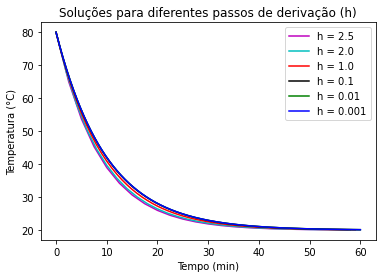

CPU times: total: 2.19 s
Wall time: 2.19 s


In [10]:
%%time
#Criando loop que percorre os elementos de passos
for passo in passos:
   
    #Criando vetor tempo
    vt = np.arange(ti,tf,passo)

    #Chamando a função sol_euler 
    T = sol_euler(vt,T0)
    
    #Grafico da curva    
    plt.plot(vt,T,'{}'.format(cores[np.where(passos==passo)[0][0]]),label='h = {}'.format(passo))

#Exibindo figura
plt.title('Soluções para diferentes passos de derivação (h)')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

&nbsp; A medida em que o passo de derivação diminui, as curvas se aproximam e suavizam. No tópico 4, estudaremos o comportamento da solução numérica comparada a solução analítica para diferentes passos de derivação.

<h2 style='color:#0000b7'>3.4 &nbsp; Estudo comparativo - Soluções numéricas e analítica</h2>

&nbsp; Este tópico tem o objetivo de comparar soluções numéricas e analítica, a fim de determinar os passos de derivação que geram uma solução numérica próxima a analítica.

&nbsp; Para o cálculo da função erro entre a solução numérica e analítica, construímos a função <i><b>f_erro(&lt;vetor_da_solução_analítica&gt;,&lt;vetor_da_solução_numérica&gt;)</b></i>:

In [11]:
%%writefile ../python/f_erro.py
def f_erro(sol_analitica,sol_numerica):
    
    erro = sol_analitica - sol_numerica
    
    return erro

Overwriting ../python/f_erro.py


&nbsp; Importando a função de <b>[11]</b>:

In [12]:
from f_erro import f_erro

&nbsp; Neste momento, escrevemos um algoritmo similar ao <b>input [10]</b>, mas, ao invés de exibir o gráfico para diferentes passos de derivação, exibiremos o erro para estes passos.

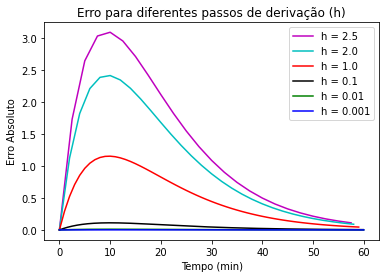

CPU times: total: 2.22 s
Wall time: 2.2 s


In [13]:
%%time
#Criando loop para diferentes passos de derivação
for passo in passos:
   
    #Criando vetor tempo 
    vt = np.arange(ti,tf,passo)
    
    #Chamando a função sol_euler 
    T = sol_euler(vt,T0)
    
    #Gerando solução analítica
    sol_analitica = 20+60*np.exp(-0.1*vt)
    
    #Chamando a função erro
    err = f_erro(sol_analitica,T)
    
    #Grafico da curva    
    plt.plot(vt,err,'{}'.format(cores[np.where(passos==passo)[0][0]]),label='h = {}'.format(passo))
    
#Exibindo figura
plt.title('Erro para diferentes passos de derivação (h)')
plt.xlabel('Tempo (min)')
plt.ylabel('Erro Absoluto')
plt.legend()
plt.show()

&nbsp; Nota-se que a medida em que o passo de derivação diminui, o erro entre a solução numérica e analítica também diminui. 
&nbsp; Desta forma, concluímos que para obter uma solução numérica aceitável pelo método de Euler, devemos tomar um passo de derivação próximo de 0. Vale salientar que para todos os passos de derivação utilizados, a solução analítica é maior que a solução numérica.

<h2 style='color:#0000b7'>3.5 &nbsp; Obtendo o maior passo de derivação para produzir uma aproximação aceitável</h2>

&nbsp; Cada problema, em particular, pode ser abordado de diferentes maneiras. Neste caso, o modelo físico descreve o comportamento da temperatura de uma xícara ao longo do tempo. &nbsp; Para este problema, utilizamos celsius como escala. Assim, antes devemos questionar o que é uma aproximação aceitável para nosso problema.

&nbsp; Qualquer solução com erro máximo menor que <b>0.4</b> é uma aproximação aceitável para este problema, dada a escala, este valor será o limite superior <i><b>limite_sup</b></i> para o erro máximo:

In [14]:
limite_sup = 0.4

&nbsp; Declaramos o passo de derivação inicial valendo 1, uma vez que estamos interessados em passos entre 0 e 1:

In [15]:
passo = 1

&nbsp; Além disso, precisamos, convenientemente, definir o decréscimo do passo de derivação, de forma que o passo de derivação tenda a zero:

In [16]:
decrescimo = 0.01

&nbsp; Além disso, vamos criar uma matriz com finalidade de armazenar o passo atual bem como seu respectivo erro máximo.

In [17]:
dados = [[0, 0]]

&nbsp; Continuando, escrevemos um <i>loop</i> de forma que o passo de derivação seja reduzido até que o erro máximo entre a solução numérica e analítica seja menor que o limite superior.

In [18]:
%%time
#variável auxiliar
err = np.array([T0])

while np.amax(err) > limite_sup:
    
    #Criando vetor tempo 
    vt = np.arange(ti,tf,passo)
    
    #Chamando a função sol_euler 
    T = sol_euler(vt,T0)
    
    #Gerando solução analítica
    sol_analitica = 20+60*np.exp(-0.1*vt)
    
    #Chamando a função erro
    err = f_erro(sol_analitica,T)
    
    #Adicionando linhas à matriz (tabela)
    dados = np.vstack([dados,[round(passo, 2),np.amax(err)]])
    
    #Realizando decrescimo do passo de derivação
    passo = passo - decrescimo

CPU times: total: 109 ms
Wall time: 93.7 ms


&nbsp; Finalmente, exibimos os dados armazenados:

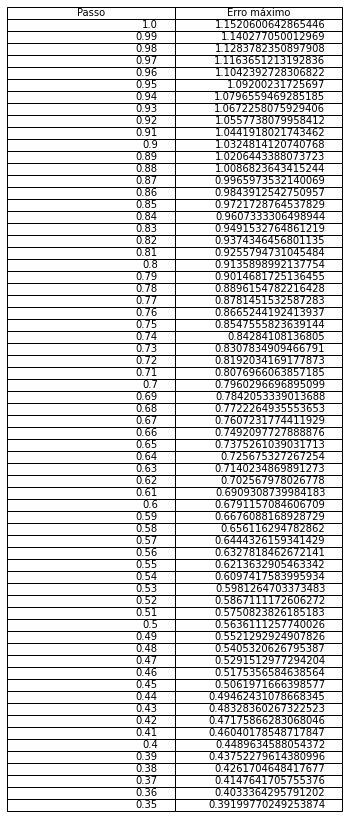

Última linha: [0.35      0.3919977]
CPU times: total: 1.5 s
Wall time: 1.51 s


In [19]:
%%time
#remove a primeira linha da matriz
dados = np.delete(dados, 0, 0)

#Exibindo tabela
fig, ax =plt.subplots(1,1)
column_labels=['Passo', 'Erro máximo']
ax.axis('tight')
ax.axis('off')
ax.table(cellText=dados,colLabels=column_labels,loc='center')

plt.show()

print('Última linha: {}'.format(dados[dados.shape[0]-1]))

Última linha: [0.35   &nbsp;    0.3919977] <br>
&nbsp; Conforme a tabela gerada pelo <b>Input [19]</b>, o passo de derivação que devemos utilizar para produzirmos uma simulação com erro máximo menor que <b>0.4</b>, sob as condições descritas ao longo deste tópico, é de <b>0.35</b>.